In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random
from statsmodels.distributions.empirical_distribution import ECDF

Мощность критерия на распределениее логистическом 0.5458
Мощность критерия на распределениее Стьюдента 0.9289
Значение критерия Колмагорова: 0.9992649581349506


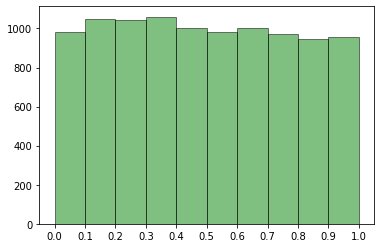

level,value
0.001,4.46753
0.002,4.57391
0.003,4.63072
0.004,4.65211
0.005,4.66487
...,...
0.995,7.20996
0.996,7.27879
0.997,7.32497
0.998,7.41042


In [73]:
def main():
    n = 252 # Cреднее число торговых дней
    statistic = []
    for i in range (10000):# Количество вычислений статистики 
        sample=[] 
        for j in range (252):
            sample.append(np.random.normal(0,1))
        R = max(sample)-min(sample)
        S = np.std(sample)
        U = R / S # Вычисление статистики критерия Дэвида-Хартли-Пирсона
        statistic.append(U)
    level=[]
    value=[]
    i=0.001
    while i <= 1:
        level.append(round(i,3))
        value.append(round(np.quantile(statistic, i),5)) # Вычисления квантиля
        i+=0.001
        
    ecdf = ECDF(value)
        
    statistic_norm = []
    pv_norm = []
    for i in range (10000):# Количество вычислений статистики 
        sample=[] 
        for j in range (252):
            sample.append(np.random.normal(0,1))
        R = max(sample)-min(sample)
        S = np.std(sample)
        U = R / S # Вычисление статистики критерия Дэвида-Хартли-Пирсона
        statistic_norm.append(U)
    
    pv_norm = ecdf(statistic_norm)
    
    statistic_log = []
    pv_log = []
    for i in range (10000):# Количество вычислений статистики 
        sample=[] 
        for j in range (252):
            sample.append(np.random.logistic(0,2/3))
        R = max(sample)-min(sample)
        S = np.std(sample)
        U = R / S # Вычисление статистики критерия Дэвида-Хартли-Пирсона
        statistic_log.append(U)
    
    pv_log = ecdf(statistic_log)
    p1=0
    for pv in pv_log:
        if (1-pv) < 0.05:
            p1 += 1
    print(f'Мощность критерия на распределениее логистическом {p1/10000}')
    
    statistic_t = []
    pv_t = []
    for i in range (10000):# Количество вычислений статистики 
        sample=[] 
        for j in range (252):
            sample.append(np.random.standard_t(4))
        R = max(sample)-min(sample)
        S = np.std(sample)
        U = R / S # Вычисление статистики критерия Дэвида-Хартли-Пирсона
        statistic_t.append(U)
    
    pv_t = ecdf(statistic_t)
    p2=0
    for pv in pv_t:
        if (1-pv) < 0.05:
            p2 += 1
    print(f'Мощность критерия на распределениее Стьюдента {p2/10000}')

    
    ks_test = []# Тест Критерия Колмагорова
    
    for i in range(10000):
        ks_test.append(stats.kstest(pv_norm,'uniform').pvalue)

    
    print(f'Значение критерия Колмагорова: {1 - np.mean(ks_test)}')
    
    num_bins = 10
    n, bins, patches = plt.hist(pv_norm, num_bins,edgecolor='black', facecolor='green', alpha=0.5)
    plt.xticks(np.arange(0,1.1,0.1))
    plt.show()

    d = [value]
    df = pd.DataFrame(data=d, index = ['value'],columns = level) # Вывод таблицы
    df.index.name = 'level'
    df = df.transpose()
    df.to_excel('Таблица_Квантилей.xlsx')
    df.to_csv('Таблица_Квантилей.txt')
    return df
    
main()